<a href="https://colab.research.google.com/github/devshaik444/Thesis_project/blob/master/generic_CSMA_CA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generic CSMA/CA algoritm

In [ ]:
from random import randint
import time
global idle
global collision
global retransmission
collision =0
idle= True
retransmission=0
class node:
 
  def __init__(self, CW, CC ,name):  #collision count=cc
    self.CW = randint(1,CW)
    self.CC = CC
    self.name =name

In [ ]:
 
def CSMA_CA(node):
  global idle # 0
  global collision
  global retransmission
  #print(node.CW)
  contention=node.CW
  while True:
    if idle: 
      node.CW= node.CW-1
      print("DecreasingCW",node.name,node.CW) 
 
    if node.CW==0 and not idle:
      node.CC= node.CC+1
      collision =collision+1
      print("collision")
      retransmission= retransmission+1
      node.CW= contention*2
 
    if node.CW==0 and idle:
      idle=False
      time.sleep(1)
      idle=True
      print("success",node.name) 
      break

In [ ]:
from threading import *
nodes=[]
for i in range(1,100):
  n = node(2,0,i)
  nodes.append(n)

process =[]
for x in nodes:
  p =Thread(target = CSMA_CA,args=[x])
  p.start()
  process.append(p)
 
for p in process:
  p.join()
finish= time.perf_counter() 
print("Transmission completed time",finish)
print("Total Collisions:",collision)
print("Total Retransmission:",retransmission)

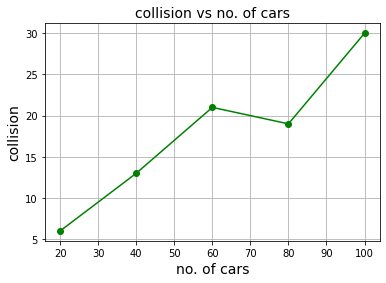

In [ ]:
import matplotlib.pyplot as plt
collision_count=[6,13,21,19,30]
no_cars=[20,40,60,80,100]
CW_2_retransmission= [0.25,0.18,0.28,0.26,0.32]
CW_5_retransmission= [0.23,0.25,0.27,0.24,0.19]
CW_7_retransmission= [0.20,0.10,0.15,0.14,0,17]
plt.plot(no_cars,collision_count , color='green', marker='o')
plt.title('collision vs no. of cars', fontsize=14)
plt.xlabel('no. of cars', fontsize=14)
plt.ylabel('collision', fontsize=14)
plt.grid(True)
plt.show()

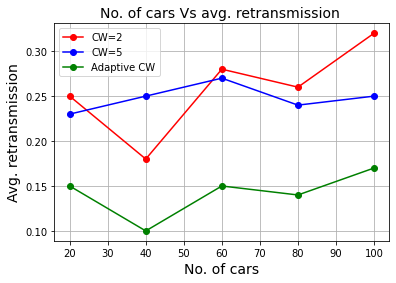

In [ ]:
CW_2_retransmission= [0.25,0.18,0.28,0.26,0.32]
CW_5_retransmission= [0.23,0.25,0.27,0.24,0.25]
CW_7_retransmission= [0.15,0.10,0.15,0.14,0.17]#adaptive
plt.plot(no_cars,CW_2_retransmission , color='red', marker='o',label='CW=2')
plt.plot(no_cars,CW_5_retransmission , color='blue', marker='o',label='CW=5')
plt.plot(no_cars,CW_7_retransmission , color='green', marker='o',label='Adaptive CW')
plt.title('No. of cars Vs avg. retransmission ', fontsize=14)
plt.xlabel('No. of cars', fontsize=14)
plt.ylabel('Avg. retransmission', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
#CW_2_total_delay= [120.88,364.86,517.69,698.48,1059.13]